In [2]:
import pandas as pd

In [7]:
#!pip install opencv-python-headless pillow matplotlib


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 1.3 MB/s eta 0:00:0000:0100:01


In [1]:
image_path = 'data/Faze1/input/dataset.csv'

In [3]:
data = pd.read_csv(image_path)

In [4]:
data.shape, data.head()

((35887, 2),
    emotion                                             pixels
 0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
 1        0  151 150 147 155 148 133 111 140 170 174 182 15...
 2        2  231 212 156 164 174 138 161 173 182 200 106 38...
 3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
 4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...)

In [7]:
import numpy as np
from main import Images

In [8]:
# Process the first image
pixel_values = np.array(data[' pixels'].iloc[0].split(), dtype='uint8')
image_array = pixel_values.reshape(48, 48)


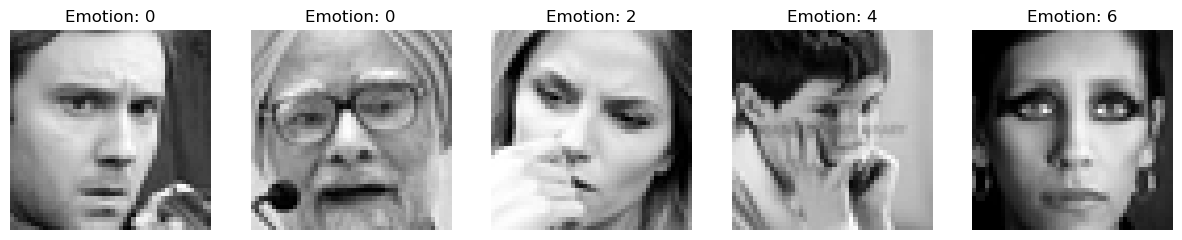

In [9]:
Images.plot(data, 5)

In [10]:
from main import Utilities

In [11]:
# Base directory to store images, grouped by emotion labels
base_image_dir = 'data/Faze1/output/Pics'
labels = data['emotion'].unique()

In [12]:
# Create directories for each label
directories = Utilities.create_directories(base_image_dir, labels)

In [ ]:
# Process each image in the dataframe
for index, row in data.iterrows():
    if not Images.save(row, directories[row['emotion']]):
        print(f"Failed to process and save image at index {index}")

In [ ]:
# Base directory to store CSVs, grouped by emotion labels
base_csv_dir = 'data/Faze1/output/CSVs'
labels = data['emotion'].unique()

In [ ]:
# Create directories for each label
directories = Utilities.create_directories(base_csv_dir, labels)

In [ ]:
import os

In [ ]:
# Split the dataset by emotion and save each subset into its corresponding directory
for label in labels:
    # Filter data for the current label
    subset = data[data['emotion'] == label]
    # Define file path
    file_path = os.path.join(directories[label], f'data_label_{label}.csv')
    # Save subset to CSV
    subset.to_csv(file_path, index=False)
    print(f"Data for label {label} saved to {file_path}")
